# Inaugural Project

**Table of contents**<a id='toc0_'></a>    
- 0. [Imports](#toc1_)    
- 1. [Basic Edgeworth box](#toc2_)   
  - 1.a [Finding pareto improvements](#toc2_1_)
  - 1.b [The set of pareto improvements in an Edgeworth box](#toc2_2_)  
- 2. [Market clearing error](#toc3_)
- 3. [Market clearing price](#toc4_)
- 4. [Utility maximization of consumer A](#toc5_)
  - 4.a [Allocation if only prices in P1 can be chosen](#toc5_1_)
  - 4.b [Allocation if any positive prices can be chosen](#toc5_2_)
- 5. [A is the market maker](#toc6_)
  - 5.a [Allocation restricted to C](#toc6_1_)
  - 5.b [Allocation if no further restrictions are imposed](#toc6_2_)
- 6. [Maximization of aggregate utility](#toc7_)
  - 6.a [Allocation when consumption is chosen by social planner](#toc7_1_)
  - 6.b [Comparing results](#toc7_2_)
- 7. [Random set of endowments](#toc8_)
- 8. [Market equilibrium allocation with random set](#toc9_)
  - 8.a [Market equilibrium for each combination of endowments in set $W$](#toc9_1_)
  - 8.b [Plotting market equilibria in Edgeworth box](#toc9_2_)



<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 0. <a id='toc1_'></a>[Imports](#toc0_)

Imports and set magics:

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import numpy as np

# We import autoreload modules to have the recent changes from the Python file. 
%load_ext autoreload
%autoreload 2

The model is set up by defining the utility functions for each consumer as well as the demand for each good for each consumer.

In [2]:
# We import our model class as "model"
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

## 1. <a id='toc2_'></a>[Basic Edgeworth box](#toc0_)

In a basic Edgeworth box all pairs of combinations of $x_1^A$ and $x_2^A$ that leave both consumers at least as well off as when they are consuming their endowments are plottet. This is done by looping though the possible values of $x_1^A$ and $x_2^A$ and finding the pairs that causes the utility of consumer A and B to be strictly larger than their utility when consuming their endowments. 

### 1.a <a id='toc2_1_'></a>[Finding pareto improvements](#toc0_)

In [3]:
#Find the pareto improvements relative to the endowment
result = model.find_pareto_improvements(N1=76, N2=76)

### 1.b <a id='toc2_2_'></a>[The set of pareto improvements in an Edgeworth box](#toc0_)

We plot the set of pareto improvements as well as the initial endowment in an Edgeworth box:

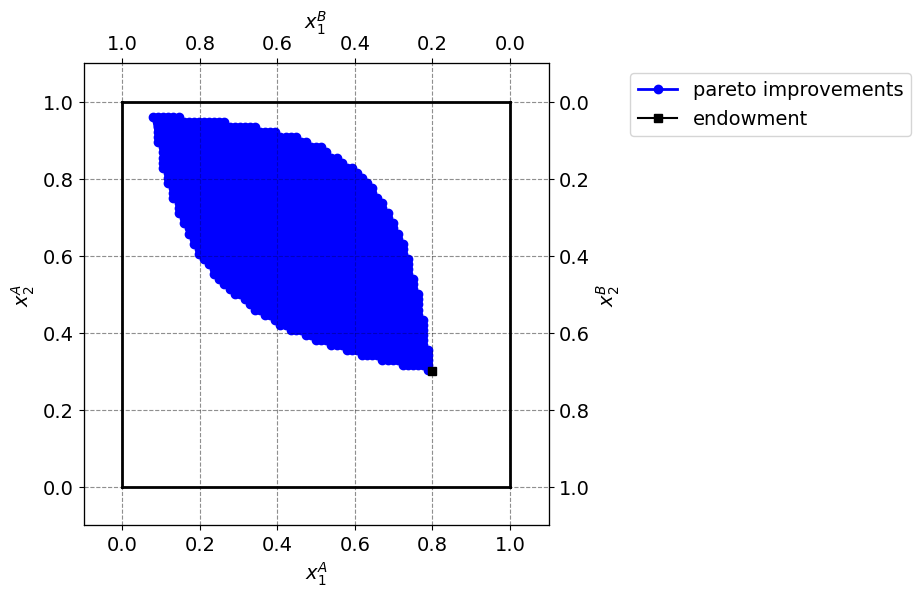

In [4]:
#Plotting the pareto improvements in an edgeworth box
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting all pairs of (x1A, x2A) in the Edgeworth box
pareto = np.array(result).T  # We transpose the matrix with the pareto improvements
ax_A.plot(pareto[0],pareto[1],lw=2, marker='o', color='blue', label='pareto improvements')

# Plotting the endowment in the Edgeworth box
ax_A.plot(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

## 2. <a id='toc3_'></a>[Market clearing error](#toc0_)

We calculate the error in the market clearing condition for the specified range of prices:

In [5]:
# Define prices 
p1_values = list(0.5 + 2 * (i / 75) for i in range(76))
p1_values_array = np.array(p1_values)

# Calculate market clearing error for both markets
eps1, eps2 = model.check_market_clearing(p1=p1_values_array)

We plot the calculated errors to get a better overview of the results:

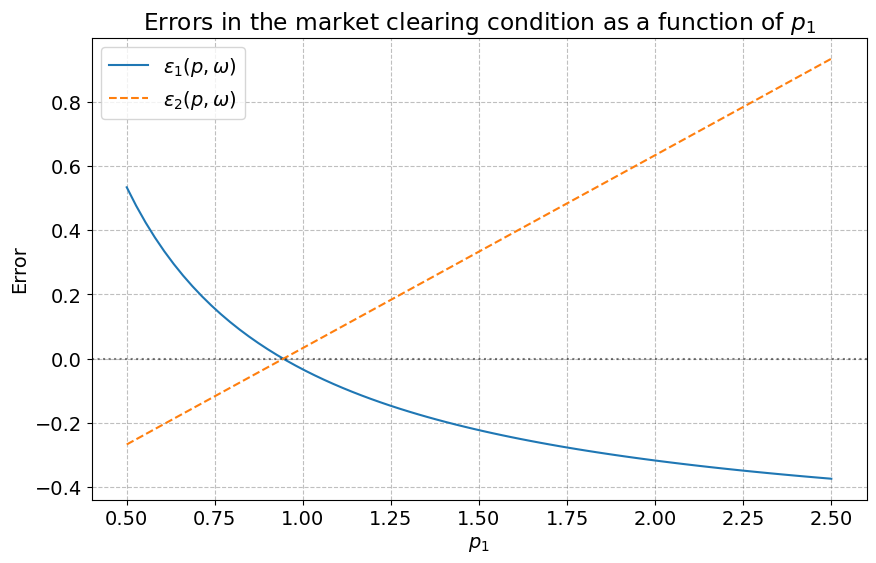

In [6]:
# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(p1_values, eps1, label='$\epsilon_1(p, \omega)$')
plt.plot(p1_values, eps2, label='$\epsilon_2(p, \omega)$', linestyle='--')
plt.axhline(0, color='k', linestyle=':', alpha=0.5)
plt.title('Errors in the market clearing condition as a function of $p_1$')
plt.xlabel('$p_1$')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

It is clear from the graph that there exists a unique market clearing price where the errors are equal to zero. This is found below. 

## 3. <a id='toc4_'></a>[Market clearing price](#toc0_)

We use Walras' law and find the market clearing price that causes the error in the market for good 1 to equal zero. 

In [7]:
#Find the market clearing price
model.find_equilibrium()

p= 0.50, excess = 0.53
p= 0.53, excess = 0.48
p= 0.55, excess = 0.42
p= 0.58, excess = 0.38
p= 0.61, excess = 0.33
p= 0.63, excess = 0.29
p= 0.66, excess = 0.26
p= 0.69, excess = 0.23
p= 0.71, excess = 0.19
p= 0.74, excess = 0.17
p= 0.77, excess = 0.14
p= 0.79, excess = 0.11
p= 0.82, excess = 0.09
p= 0.85, excess = 0.07
p= 0.87, excess = 0.05
p= 0.90, excess = 0.03
p= 0.93, excess = 0.01
p= 0.95, excess = -0.01
p= 0.98, excess = -0.02
p= 1.01, excess = -0.04
p= 1.03, excess = -0.05
p= 1.06, excess = -0.07
p= 1.09, excess = -0.08
p= 1.11, excess = -0.09
p= 1.14, excess = -0.10
p= 1.17, excess = -0.11
p= 1.19, excess = -0.13
p= 1.22, excess = -0.14
p= 1.25, excess = -0.15
p= 1.27, excess = -0.15
p= 1.30, excess = -0.16
p= 1.33, excess = -0.17
p= 1.35, excess = -0.18
p= 1.38, excess = -0.19
p= 1.41, excess = -0.20
p= 1.43, excess = -0.20
p= 1.46, excess = -0.21
p= 1.49, excess = -0.22
p= 1.51, excess = -0.23
p= 1.54, excess = -0.23
p= 1.57, excess = -0.24
p= 1.59, excess = -0.24
p= 1.62, 

Here we have first find a price interval where the market error is close to zero by looping over the possible prices and then use an optimizer to find the exact market price where the market error for good 1 is zero. At this price both the markets for good 1 and good 2 clear.

## 4. <a id='toc5_'></a>[Utility maximization of consumer A](#toc0_)

### 4.a <a id='toc5_1_'></a>[Allocation if only prices in P1 can be chosen](#toc0_)

We find the optimal allocation for A where A chooses the price to maximize her own utility. A can choose between the list of prices given in question 2.

In [8]:
model.Utility_max_a()

Consumer A´s maximized utility is 0.6336 at p1 = 1.8867
The allocation is then x1A = 0.6193 and x2A = 0.6409


/Users/claraengelund/Desktop/Programmer/projects-2024-clara-og-theis/inauguralproject/ExchangeEconomy.py:24: RuntimeWarning: invalid value encountered in scalar power
  return x1A**par.alpha*x2A**(1-par.alpha)


### 4.b <a id='toc5_2_'></a>[Allocation if any positive prices can be chosen](#toc0_)

We find the optimal allocation for A where A can choose any positive price:

In [9]:
model.Utility_max_b()

Consumer A´s maximised utility is 0.6336 at p1 = 1.8968
The allocation is then x1A = 0.6206 and x2A = 0.6402


## 5. <a id='toc6_'></a>[A is the market maker](#toc0_)

Now it is assumed that A is the market maker and thereby chooses B's consumption.

### 5.a <a id='toc6_1_'></a>[Allocation restricted to C](#toc0_)

We find the allocation where consumer A's utility is maximized under the restriction that the choice set is restricted to C. That is, we loop through the pareto improvements found in exercise 1 and find the pair of $x_1^A$ and $x_2^A$ that maximizes the utility of consumer A.

In [10]:
#Find the allocation when the choice set is restricted to C
model.pareto_optimizer()

The allocation is x1A = 0.5921 and x2A = 0.8289 with utility of consumer A equal to 0.7410


### 5.b <a id='toc6_2_'></a>[Allocation if no further restrictions are imposed](#toc0_)

We find the allocation when consumer A is the market maker but B is not worse of than when consuming the initial endowment. This is done by maximizing the utility of consumer A under the constraint that the difference between B's utility when consuming the proposed amount compared to consuming the endowment has to be non-negative. 

In [11]:
#Find the allocation when there is no restriction but the fact that B has to be better of than when consuming the endowment
model.marketmaker_solver()

The allocation is x1A = 0.5757 and x2A = 0.8444 with utility of consumer A equal to 0.7432


## 6. <a id='toc7_'></a>[Maximization of aggregate utility](#toc0_)

### 6.a <a id='toc7_1_'></a>[Allocation when consumption is chosen by social planner](#toc0_)

The aggregate utility of consumer A and B is maximized such that the consumption levels are chosen by a utalitarian social planner.

In [12]:
#Find allocation when aggregate utility is maximized
model.socialplanner_solver()

The allocation is x1A = 0.3334, x2A = 0.6668, x1B = 0.6666 and x2B = 0.3332
The utility of consumer A is 0.5293 and the utility of consumer B is 0.5290


Now the utility of consumer A is considerably lower. 
The solutions corresponds to the values of $\alpha$ and $\beta$ reflecting the consumers' preferences for good 1 and good 2. This makes sense since we consider Cobb-Douglas utility functions.

### 6.b <a id='toc7_2_'></a>[Comparing results](#toc0_)

To compare results from question 3-5 we plot all the different optimal allocations in an Edgeworth box.

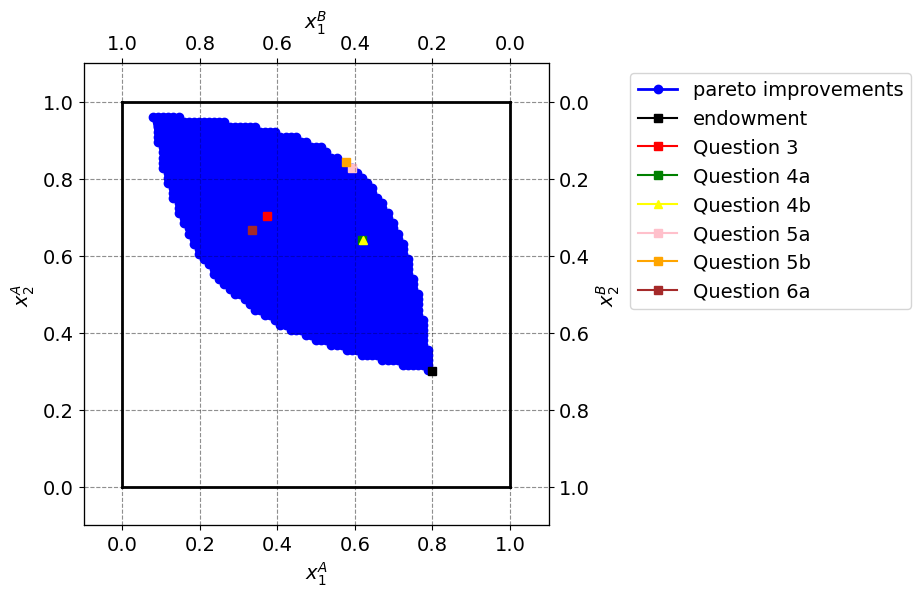

In [13]:
#Plotting the pareto improvements in an edgeworth box
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

xA1_3 = model.demand_A(0.9444)[0]
xA2_3 = model.demand_A(0.9444)[1]
xA1_4a = model.Utility_max_a(do_print=False)[0]
xA2_4a = model.Utility_max_a(do_print=False)[1]
xA1_4b = model.Utility_max_b(do_print=False)[0]
xA2_4b = model.Utility_max_a(do_print=False)[1]
xA1_5a = model.pareto_optimizer(do_print=False)[0]
xA2_5a = model.pareto_optimizer(do_print=False)[1]
xA1_5b = model.marketmaker_solver(do_print=False)[0]
xA2_5b = model.marketmaker_solver(do_print=False)[1]
xA1_6a = model.socialplanner_solver(do_print=False)[0]
xA2_6a = model.socialplanner_solver(do_print=False)[1]

# Plotting all pareto improvements in the Edgeworth box
pareto = np.array(result).T  # We transpose the matrix with the pareto improvements
ax_A.plot(pareto[0],pareto[1],lw=2, marker='o', color='blue', label='pareto improvements')

#Plotting the endowment as well as the answers to the questions
ax_A.plot(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.plot(xA1_3, xA2_3, marker='s', color='red', label='Question 3')
ax_A.plot(xA1_4a, xA2_4a, marker='s', color='green', label='Question 4a')
ax_A.plot(xA1_4b, xA2_4b, marker='^', color='yellow', label='Question 4b')
ax_A.plot(xA1_5a, xA2_5a, marker='s', color='pink', label='Question 5a')
ax_A.plot(xA1_5b, xA2_5b, marker='s', color='orange', label='Question 5b')
ax_A.plot(xA1_6a, xA2_6a, marker='s', color='brown', label='Question 6a')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.8,1.0));

From the plot depicted above, it is evident that there is a signficiant difference in allocations when comparing the scenarios. There is almost no difference between scenarios 4a and 4b since the prices and consequently the allocation yielding the highest utility were nearly encompassed within the constrained list of prices in 4a. However, the utility of consumer A is a bit higher in 4b when any positive price can be chosen. The most substantial deviation in allocation occurs when A becomes the market maker. Here consumer A ends up with a relatively large amount of both goods and the largest amount of utility. In general, consumer A prefers a lot of good 2 which is also reflected in the figure. In the allocation of the social planner the utility of consumer A is the lowest which makes sense because both the utility of consumer A and B are considered. 

All the allocations are pareto improvements compared to the initial endowment for both players. However, the distribution of utility between the two consumers differ a lot. Especially when consumer A is the market maker the utility of consumer A is relatively high. In that way the allocations in question 4 may seem a bit more fair. Ultimately the allocation of the social planner seems the most fair as the utility of both players is taken into account. 

## 7. <a id='toc8_'></a>[Random set of endowments](#toc0_)

A random set of endowments is created by drawing 50 random $w_1^A$ and $w_2^A$ from a uniform distribution. 

In [17]:
#Draw a set of endowments with 50 elements
w = model.setw(s = 50)
print(w)

[(0.570517285378466, 0.5044148379192928), (0.56452875520484, 0.6037314499177909), (0.48844183254450535, 0.8375485848212164), (0.3364777534653247, 0.610182460329334), (0.3758681778119588, 0.7355727638774857), (0.532035868838685, 0.4097661316129019), (0.06810628846711264, 0.48964001071929286), (0.5845290601966381, 0.5089245204524442), (0.23789776342109814, 0.5064823102252063), (0.16075658153974937, 0.6183410688703261), (0.15211914914792302, 0.8346048167240424), (0.12706921895137258, 0.5865653764508133), (0.3274411663720117, 0.021307389755686468), (0.6941538730112569, 0.7356233589733003), (0.358966469406951, 0.9206336566025977), (0.8913656558995818, 0.7556772210161681), (0.2018798794246912, 0.2847557821358644), (0.11060250345361267, 0.949599016350066), (0.5275567612904862, 0.839882848029037), (0.8676553290111667, 0.8149500045971086), (0.2618743783611466, 0.7436777736788525), (0.4993951212412697, 0.9148693732520856), (0.42856440131602347, 0.8962339825792529), (0.5300038886795768, 0.1204038

## 8. <a id='toc9'></a>[Market equilibrium allocation with random set](#toc0_)

A market equilibrium allocation is found for each pair of endowments in $W$ by finding the price within all positive prices that causes the error in the market clearing condition for good 1 to become zero for each endowment pair. 

### 8.a <a id='toc9_1_'></a>[Market equilibrium for each combination of endowments in set $W$](#toc0_)

We start by finding the market equilibrium for each combination of endowments in set W.

In [15]:
#Find market equilibria for each endowment combination
equilibria = model.equilibriumallocation()

### 8.b <a id='toc9_2_'></a>[Plotting market equilibria in an Edgeworth box](#toc0_)

Afterwards we plot the findings from 8.a in the Edgeworth box shown below.

(1.1, -0.1)

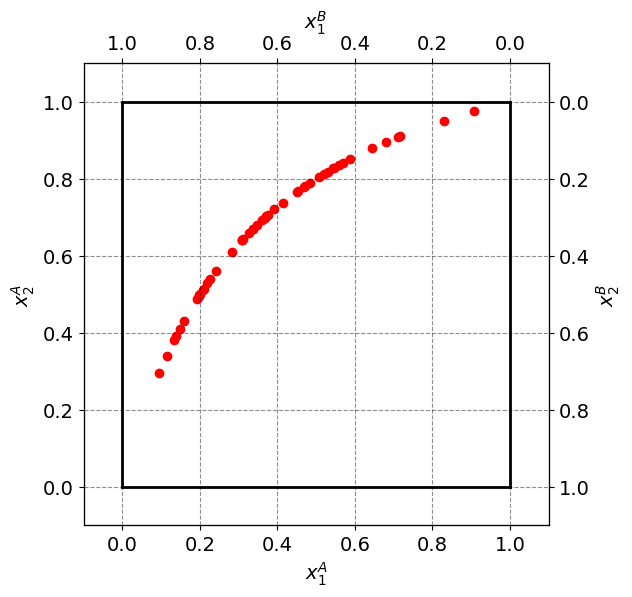

In [16]:
#Plotting the market equilibria in an edgeworth box
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting all pairs of (x1A, x2A) in the Edgeworth box
curve = np.array(equilibria).T  
ax_A.scatter(curve[0],curve[1], marker='o', color='red')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

The market equilibria create the contract curve in the Edgeworth box. 